In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [2]:
df = pd.read_excel(r"D:\data science\case study7\iris.xls")
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

## Basic details of the dataset

In [3]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
df.shape

(150, 5)

In [8]:
#Handling missing values
df['SL'] = df['SL'].fillna(df['PL'].mean())
df['SW'] = df['SW'].fillna(df['PL'].mean())
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [9]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

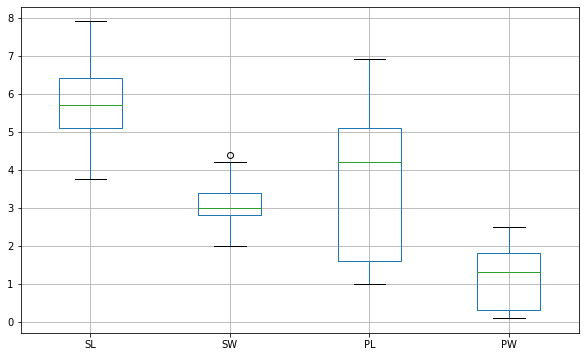

In [10]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.show()

In [11]:
#Handling outlier in 'SW'
#calculating percentiles
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',round(low_lim,2))

#creating a list of outliers
outlier=[]
for x in df['SW']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  2.8 
Q2 =  3.0 
Q3 =  3.4
IQR =  0.6
Upper limit =  4.3 
Lower limit =  1.9
List of outliers:  [4.4]


In [12]:
#finding index values of outliers
df.loc[(df['SW']>up_lim ) | (df['SW']<low_lim)].index

Int64Index([15], dtype='int64')

In [13]:
#removing the outliers
df.drop([15],inplace=True)

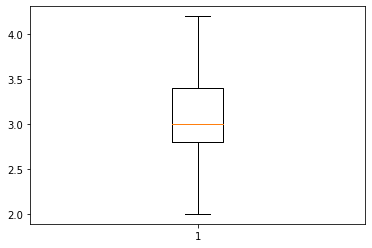

In [14]:
#Boxplot of 'SW'
plt.boxplot(df['SW'])
plt.show()

In [15]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
df['Classification']=label_en.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.10000,3.5,1.4,0.2,0
1,4.90000,3.0,1.4,0.2,0
2,3.75625,3.2,1.3,0.2,0
3,4.60000,3.1,1.5,0.2,0
4,5.00000,3.6,1.4,0.2,0


In [16]:
X=df.drop(['Classification'],axis=1)
y=df['Classification']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [18]:
X_train.shape

(104, 4)

In [19]:
X_test.shape

(45, 4)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))

Accuracy is:  0.8666666666666667


In [23]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0,  9,  4],
       [ 0,  1, 12]], dtype=int64)

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred =  classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

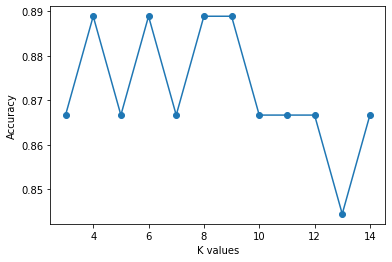

In [25]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [26]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [27]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.8666666666666667


In [28]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 10,  3],
       [ 0,  2, 11]], dtype=int64)

# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [30]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.9111111111111111
